#1. 군집

In [59]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

arr = np.array([[1,2,3], [4,5,6]] )
euclidean_distances(arr)

array([[0.        , 5.19615242],
       [5.19615242, 0.        ]])

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(arr)

array([[1.        , 0.97463185],
       [0.97463185, 1.        ]])

In [61]:
#MNIST fashion 샘플 데이터
import tensorflow as tf
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# 1. Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [62]:
#10개의 군집
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit( test_images.reshape(-1, 28*28) )
kmeans.cluster_centers_.shape

(10, 784)

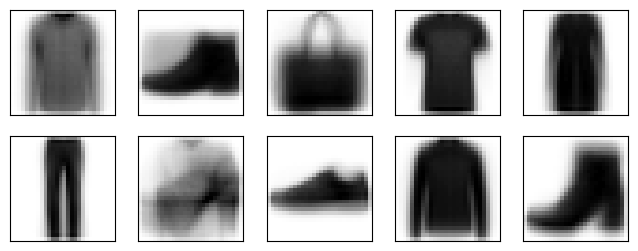

In [63]:
# 시각화
from matplotlib import pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))	#10개의 그림을 2행5열로 표시
centers = kmeans.cluster_centers_.reshape(10, 28, 28)	#10개 숫자, 각 그림 픽셀 (8 by 8)로 shape 변경

#표시
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()


In [ ]:
#10개의 군집: HC
hc = AgglomerativeClustering(n_clusters=10)
clusters = hc.fit( test_images.reshape(-1, 28*28) )

In [74]:
hc_df = pd.DataFrame(test_images.reshape(-1, 28*28))
hc_df["cluster"] = clusters.labels_
hc_center = hc_df.groupby("cluster").mean().values

In [75]:
hc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,3,0,3,174,189,67,0,0,0,5
2,0,0,0,0,0,0,0,0,1,0,...,58,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,21,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,2,0,1,1,0,0,0,...,12,0,0,0,0,0,0,0,0,9


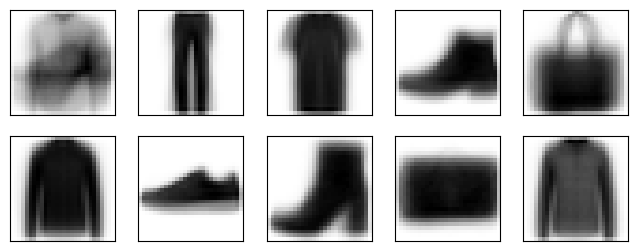

In [76]:
# 시각화
from matplotlib import pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))	#10개의 그림을 2행5열로 표시
centers = hc_center.reshape(10, 28, 28)	#10개 숫자, 각 그림 픽셀 (8 by 8)로 shape 변경

#표시
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()


In [103]:
#DBSCAN+PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X_pca = pca.fit_transform(test_images.reshape(-1, 28*28))
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit(X_pca)

In [104]:
db_df = pd.DataFrame(test_images.reshape(-1, 28*28))
db_df["cluster"] = clusters.labels_
db_center = db_df.groupby("cluster").mean().values

In [105]:
clusters.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [88]:
#DBSCAN+UMAP
import umap  #Uniform Manifold Approximation and Projection, 비선형 차원 축

#UMAP으로 차원 축소 (2D or 10D)
umap_reducer = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(test_images.reshape(-1, 28*28))

dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit(X_umap)


In [89]:
clusters.labels_

array([0, 1, 2, ..., 3, 2, 0])

In [90]:
db_df = pd.DataFrame(test_images.reshape(-1, 28*28))
db_df["cluster"] = clusters.labels_
db_center = db_df.groupby("cluster").mean().values

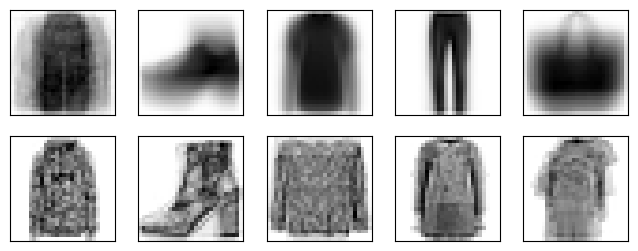

In [91]:
# 시각화
from matplotlib import pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))	#10개의 그림을 2행5열로 표시
centers = db_center.reshape(10, 28, 28)	#10개 숫자, 각 그림 픽셀 (8 by 8)로 shape 변경

#표시
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()

#2. 패턴


- 지지도(Support)

- 어떤 규칙의 지지도가 10%라면 전체 트랜젝션(트랜잭션은 작업의 완전성 을 보장해주는 것이다) 중 그 규칙을 따르고 있는 트랜젝션이 10%를 차지한다는 의미. 즉, 두 품목 A와 B의 지지도는 전체 거래 항목 중에서 항목 A와 항목 B를 동시에 포함하는 거래의 비율을 의미


$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Support = P(A {\cap} B) $

                          품목 A와 품목 B를 포함하는 거래수 / 전체 거래 수

- 신뢰도(Confidence)

- 항목 A의 거래중에서 항목 B가 포함된 거래의 비율.

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Confidence = P(B | A) = {\dfrac {P(A {\cap} B)}{P(A)}} $

                          지지도(Support) / P(A)

- 향상도(Lift:improvement)

- A ${\rightarrow}$ B 의 연관 규칙에서 임의로(Random) B가 구매되는 경우에 비해 A와의 관계가 고려되어 구매되는 경우의 비율. 즉, 연관 규칙이 오른쪽 항목을 예측하기 위한 능력이 얼마나 향상되었는가를 표현하는 값.

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Lift = {\dfrac{P(B|A)}{P(B)}} = {\dfrac{P(A{\cap}B)}{P(A)P(B)}} $

                          신뢰도(Confidence) / P(B)




In [49]:
!pip install mlxtend==0.23.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.23.4
    Uninstalling mlxtend-0.23.4:
      Successfully uninstalled mlxtend-0.23.4


In [50]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [51]:
def func1( x ):
  if( x<=0.0):
    return False
  else:
    return True

In [52]:
data = pd.read_csv("data_3.csv")
data["user"] = data["user"].astype("str")
data["artist"] = data["artist"].str.strip()
data1 = data.groupby([ "user","artist"])["qty"].sum().unstack().fillna(0).applymap(func1)
data1.head()
#또는
data2 = pd.pivot_table( data, index="user", columns="artist", values="qty", aggfunc="sum", fill_value=0 ).applymap(func1)

/tmp/ipython-input-52-3254219379.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data1 = data.groupby([ "user","artist"])["qty"].sum().unstack().fillna(0).applymap(func1)
/tmp/ipython-input-52-3254219379.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data2 = pd.pivot_table( data, index="user", columns="artist", values="qty", aggfunc="sum", fill_value=0 ).applymap(func1)


In [53]:
tmp1  = apriori( data1, min_support=0.01, use_colnames=True )
tmp1  = fpgrowth( data1, min_support=0.01, use_colnames=True )

In [54]:
patterns = association_rules( tmp1, metric='confidence', min_threshold=0.05)
patterns.sort_values(by='lift', ascending=False).head(5)#lift 기준 내림차순

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4093,(the game),(snoop dogg),0.013848,0.024728,0.010880,0.785714,31.774286,0.010538,4.551269,0.982128
4092,(snoop dogg),(the game),0.024728,0.013848,0.010880,0.440000,31.774286,0.010538,1.760986,0.993085
3345,(cascada),(scooter),0.020772,0.020772,0.010880,0.523810,25.217687,0.010449,2.056380,0.980716
3344,(scooter),(cascada),0.020772,0.020772,0.010880,0.523810,25.217687,0.010449,2.056380,0.980716
1496,(armin van buuren),(atb),0.019782,0.024728,0.011869,0.600000,24.264000,0.011380,2.438180,0.978137


In [56]:
#chipotle.tsv에 대해서 패턴을 발견. (delimiter="\t", header=0)
data = pd.read_csv("chipotle.tsv", delimiter="\t", header=0)
data["order_id"] = data["order_id"].astype("str")
data["item_name"] = data["item_name"].str.strip()
data1 = pd.pivot_table( data, index="order_id", columns="item_name", values="quantity", aggfunc="sum", fill_value=0 ).applymap(func1)

/tmp/ipython-input-56-2141633184.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data1 = pd.pivot_table( data, index="order_id", columns="item_name", values="quantity", aggfunc="sum", fill_value=0 ).applymap(func1)


In [57]:
#tmp1  = apriori( data1, min_support=0.01, use_colnames=True )
tmp1  = fpgrowth( data1, min_support=0.01, use_colnames=True )

In [58]:
patterns = association_rules( tmp1, metric='confidence', min_threshold=0.05 )
patterns.sort_values(by='lift', ascending=False).head(2)#lift 기준 내림차순

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
82,(Chips),"(Bottled Water, Chicken Bowl)",0.113413,0.037623,0.015267,0.134615,3.578038,0.011,1.112080,0.812687
78,"(Bottled Water, Chicken Bowl)",(Chips),0.037623,0.113413,0.015267,0.405797,3.578038,0.011,1.492061,0.748685


#3. 추천

##3.1. Collaborative Filtering (협업 필터링)
- 추천 시스템: 고객의 선호, 관심, 구매경력과 같은 개인화 정보를 기초로 고객에게 가장 알맞은 구매정보 제공
- 방식
  - Item-based collaborative filtering: item 간 similarity를 기반으로 추천
  - User-based collaborative filtering: user 간 similarity를 기반으로 추천
    - 성능이 다른 방식에 비해 떨어지는 것으로 알려져있음
  - Matrix factorization collaborative filtering: 잠재요인이 있다고 가정하여, 그 잠재요인을 행렬분해를 통해 찾아냄
    - 일반적으로 SVD(singular value decomposition)을 활용

- Input: user-item matrix (preference matrix)
  - 일반적으로 5점 척도로 구성된 rating + cosine similarity
  - binary인 경우 jaccard similarity 사용

- 한계
  - 단순 matrix를 사용하여 추천하기 때문에 context/content를 고려하지 않음
    - 최근에는 item의 text 정보, user의 context 정보들을 반영하여 딥러닝 기반의 추천 시스템 등장

In [ ]:
import pandas as pd
df = pd.read_csv('movies.csv')

In [ ]:
df.head()

,userId,title,rating,timestamp
0,1,American Pie,4.0,1260759139
1,4,American Pie,4.0,949896114
2,15,American Pie,4.0,1052896867
3,30,American Pie,2.0,994439964
4,34,American Pie,4.0,973747765


In [ ]:
df = df.pivot_table('rating', index = 'userId', columns = 'title')
df.head()

title,10 Things I Hate About You,12 Angry Men,1408,15 Minutes,16 Blocks,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2046,21 Grams,25th Hour,...,Willy Wonka & the Chocolate Factory,World Trade Center,X-Men Origins: Wolverine,Y Tu Mamá También,You Only Live Twice,"You, Me and Dupree",Young Frankenstein,Zodiac,eXistenZ,xXx
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(670, 856)

- user들별로 평점을 주는 범위가 다르기 때문에 scaling하여 조정

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index = df.index)
df_scaled

title,10 Things I Hate About You,12 Angry Men,1408,15 Minutes,16 Blocks,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2046,21 Grams,25th Hour,...,Willy Wonka & the Chocolate Factory,World Trade Center,X-Men Origins: Wolverine,Y Tu Mamá También,You Only Live Twice,"You, Me and Dupree",Young Frankenstein,Zodiac,eXistenZ,xXx
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.555556,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Item-based collaborative filtering
- Item*user으로 구성된 matrix를 사용하여 유사도 측정

In [ ]:
df_scaled = df_scaled.transpose().fillna(0)
df_scaled.head(5)

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
15 Minutes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
16 Blocks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


- user들 간 평점이 비슷한 정도를 기반으로 영화들의 유사도 평가

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
movie_sim = cosine_similarity(df_scaled, df_scaled)
print(movie_sim.shape)

(856, 856)


In [ ]:
movie_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.08998054,
        0.07767356],
       [0.        , 0.        , 0.        , ..., 0.08998054, 1.        ,
        0.0226314 ],
       [0.        , 0.        , 0.        , ..., 0.07767356, 0.0226314 ,
        1.        ]])

In [ ]:
movie_sim = pd.DataFrame(movie_sim, index = df_scaled.index, columns = df_scaled.index)

In [ ]:
movie_sim['Sin City'].sort_values(ascending=False)[:10]

,Sin City
title,
Sin City,1.000000
The Sentinel,0.692308
Freddy vs. Jason,0.667124
Austin Powers in Goldmember,0.240820
The Mummy Returns,0.217571
"Monsters, Inc.",0.208739
Saw IV,0.200063
Dances with Wolves,0.186198
Apocalypse Now,0.176147


##3.2. CF

In [106]:
import numpy as np
import pandas as pd

In [107]:
ratings_df = pd.read_csv('small_movie_ratings.csv', index_col=0)
ratings_df

,15,30,311,452,468,509,547,564,624,73
movie,,,,,,,,,,
88 Minutes,2.0,4.0,2.0,NaN,2.0,2.0,1.5,2.0,3.0,3.5
A Time to Kill,3.0,5.0,2.5,2.0,2.0,3.0,NaN,4.0,3.0,3.0
Barry Lyndon,4.0,NaN,3.0,3.0,3.0,3.5,4.0,5.0,4.0,2.5
Gleaming the Cube,2.5,4.0,4.0,NaN,3.0,3.0,3.0,4.0,3.0,4.0
Judgment Night,4.0,4.0,4.0,4.0,3.5,3.0,2.5,1.0,NaN,4.5
License to Wed,5.0,4.0,NaN,2.0,3.0,4.0,3.5,5.0,4.0,5.0
Lonely Hearts,5.0,5.0,3.0,4.0,4.0,4.0,5.0,5.0,NaN,4.0
Mr. Holland's Opus,2.0,1.0,3.5,3.0,2.5,2.0,NaN,4.0,4.0,3.5
Psycho,2.0,3.0,4.0,4.0,3.0,3.0,3.0,5.0,3.0,NaN


In [108]:
user1 = [0, 1, 2]
user2 = [0, 1, 2]
np.corrcoef(user1, user2)[0, 1]

np.float64(1.0)

In [109]:
user1 = [0, 1, 2]
user2 = [0, 2, 4]
np.corrcoef(user1, user2)[0, 1]

np.float64(1.0)

In [110]:
user1 = [0, 1, 2, 3]
user2 = [3, 2, 1, 0]
np.corrcoef(user1, user2)[0, 1]

np.float64(-1.0)

In [111]:
def find_correlation_between_two_users(ratings_df: pd.DataFrame, user1: str, user2: str):
    """Find correlation between two users based on their rated movies using Pearson correlation"""
    rated_movies_by_both = ratings_df[[user1, user2]].dropna(axis=0).values
    user1_ratings = rated_movies_by_both[:, 0]
    user2_ratings = rated_movies_by_both[:, 1]
    return np.corrcoef(user1_ratings, user2_ratings)[0, 1]

In [112]:
users = list(ratings_df.columns)
movies = list(ratings_df.index)
similarity_matrix = np.array([[find_correlation_between_two_users(ratings_df, user1, user2) for user1 in users] for user2 in users])
similarity_df = pd.DataFrame(similarity_matrix, columns=users, index=users)

In [113]:
similarity_df

,15,30,311,452,468,509,547,564,624,73
15,1.000000,0.395367,0.305552,0.230556,0.434940,0.469956,0.123855,0.006502,0.267311,0.462184
30,0.395367,1.000000,-0.186997,0.140313,0.102723,0.535891,0.330386,-0.154949,-0.122837,0.122264
311,0.305552,-0.186997,1.000000,0.746033,0.344309,0.238744,-0.013878,-0.011111,-0.016278,0.513114
452,0.230556,0.140313,0.746033,1.000000,0.807781,0.453188,0.145556,-0.534522,0.537484,0.449013
468,0.434940,0.102723,0.344309,0.807781,1.000000,0.595241,0.606714,-0.090911,0.676868,0.500932
509,0.469956,0.535891,0.238744,0.453188,0.595241,1.000000,0.734303,-0.204034,0.554024,0.511659
547,0.123855,0.330386,-0.013878,0.145556,0.606714,0.734303,1.000000,0.344611,0.436309,-0.072267
564,0.006502,-0.154949,-0.011111,-0.534522,-0.090911,-0.204034,0.344611,1.000000,-0.423610,-0.440686
624,0.267311,-0.122837,-0.016278,0.537484,0.676868,0.554024,0.436309,-0.423610,1.000000,0.501961
73,0.462184,0.122264,0.513114,0.449013,0.500932,0.511659,-0.072267,-0.440686,0.501961,1.000000


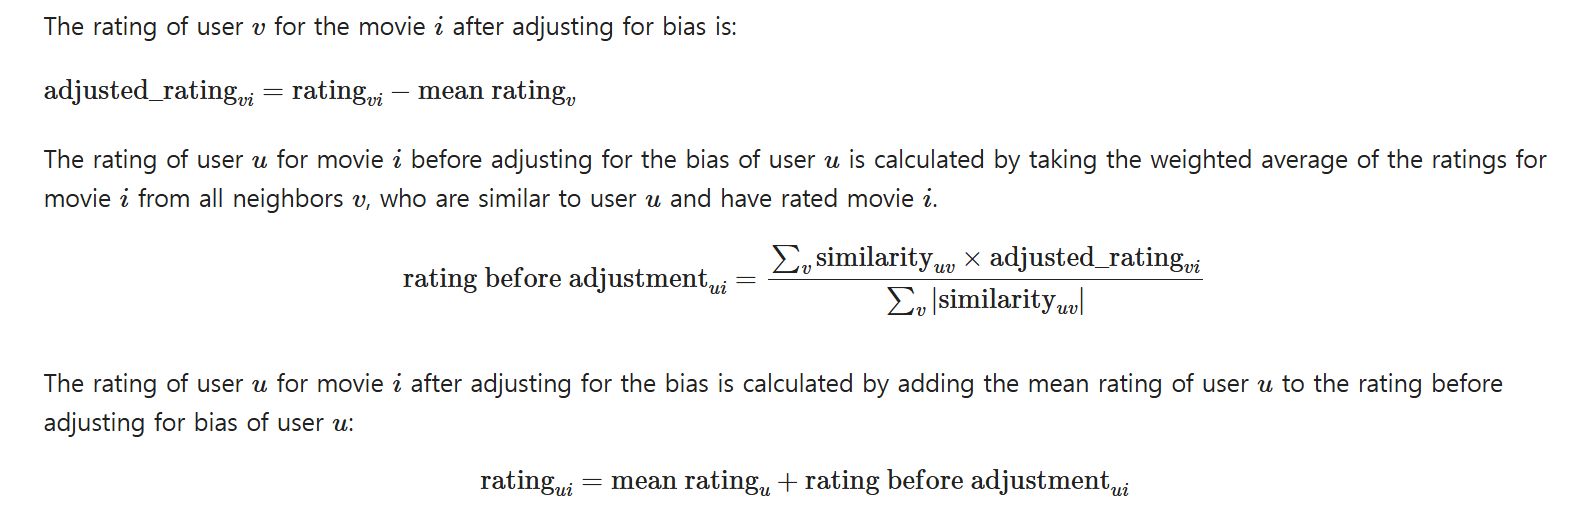

In [114]:
def get_rated_user_for_a_movie(ratings_df: pd.DataFrame, movie: str):
    return ratings_df.loc[movie, :].dropna().index.values


def get_top_neighbors(
    similarity_df: pd.DataFrame, user: str, rated_users: str, n_neighbors: int
):
    return similarity_df[user][rated_users].nlargest(n_neighbors).to_dict()


def subtract_bias(rating: float, mean_rating: float):
    return rating - mean_rating


def get_neighbor_rating_without_bias_per_movie(
    ratings_df: pd.DataFrame, user: str, movie: str
):
    """Substract the rating of a user from the mean rating of that user to eliminate bias"""
    mean_rating = ratings_df[user].mean()
    rating = ratings_df.loc[movie, user]
    return subtract_bias(rating, mean_rating)


def get_ratings_of_neighbors(ratings_df: pd.DataFrame, neighbors: list, movie: str):
    """Get the ratings of all neighbors after adjusting for biases"""
    return [
        get_neighbor_rating_without_bias_per_movie(ratings_df, neighbor, movie)
        for neighbor in neighbors
    ]

def get_weighted_average_rating_of_neighbors(ratings: list, neighbor_distance: list):
    weighted_sum = np.array(ratings).dot(np.array(neighbor_distance))
    abs_neigbor_distance = np.abs(neighbor_distance)
    return weighted_sum / np.sum(abs_neigbor_distance)


def ger_user_rating(ratings_df: pd.DataFrame, user: str, avg_neighbor_rating: float):
    user_avg_rating = ratings_df[user].mean()
    return round(user_avg_rating + avg_neighbor_rating, 2)

In [115]:
def predict_rating(
    df: pd.DataFrame,
    similarity_df: pd.DataFrame,
    user: str,
    movie: str,
    n_neighbors: int = 2,
):
    """Predict the rating of a user for a movie based on the ratings of neighbors"""
    ratings_df = df.copy()

    rated_users = get_rated_user_for_a_movie(ratings_df, movie)

    top_neighbors_distance = get_top_neighbors(
        similarity_df, user, rated_users, n_neighbors
    )
    neighbors, distance = top_neighbors_distance.keys(), top_neighbors_distance.values()

    print(f"Top {n_neighbors} neighbors of user {user}, {movie}: {list(neighbors)}")

    ratings = get_ratings_of_neighbors(ratings_df, neighbors, movie)
    avg_neighbor_rating = get_weighted_average_rating_of_neighbors(
        ratings, list(distance)
    )

    return ger_user_rating(ratings_df, user, avg_neighbor_rating)

In [116]:
movie = "88 Minutes"
user1 = "15"
rating = predict_rating(ratings_df, similarity_df, user1, movie)
rating

Top 2 neighbors of user 15, 88 Minutes: ['15', '509']


np.float64(2.0)

In [117]:
full_ratings = ratings_df.copy()

for user, movies in full_ratings.items():
    for movie in movies.keys():
        if np.isnan(full_ratings.loc[movie, user]):
            full_ratings.loc[movie, user] = predict_rating(
                ratings_df, similarity_df, user, movie
            )

Top 2 neighbors of user 30, Barry Lyndon: ['509', '15']
Top 2 neighbors of user 311, License to Wed: ['452', '73']
Top 2 neighbors of user 311, Sleepless in Seattle: ['452', '73']
Top 2 neighbors of user 452, 88 Minutes: ['468', '311']
Top 2 neighbors of user 452, Gleaming the Cube: ['468', '311']
Top 2 neighbors of user 452, The Endless Summer: ['468', '311']
Top 2 neighbors of user 452, The Forbidden Kingdom: ['468', '311']
Top 2 neighbors of user 452, The Terminal: ['468', '311']
Top 2 neighbors of user 468, Rain Man: ['452', '624']
Top 2 neighbors of user 547, A Time to Kill: ['509', '468']
Top 2 neighbors of user 547, Mr. Holland's Opus: ['509', '468']
Top 2 neighbors of user 547, The 39 Steps: ['509', '468']
Top 2 neighbors of user 624, Judgment Night: ['468', '509']
Top 2 neighbors of user 624, Lonely Hearts: ['468', '509']
Top 2 neighbors of user 73, Psycho: ['311', '509']


In [118]:
full_ratings

,15,30,311,452,468,509,547,564,624,73
movie,,,,,,,,,,
88 Minutes,2.0,4.00,2.00,2.20,2.00,2.0,1.50,2.0,3.00,3.5
A Time to Kill,3.0,5.00,2.50,2.00,2.00,3.0,2.90,4.0,3.00,3.0
Barry Lyndon,4.0,4.28,3.00,3.00,3.00,3.5,4.00,5.0,4.00,2.5
Gleaming the Cube,2.5,4.00,4.00,3.68,3.00,3.0,3.00,4.0,3.00,4.0
Judgment Night,4.0,4.00,4.00,4.00,3.50,3.0,2.50,1.0,3.66,4.5
License to Wed,5.0,4.00,3.01,2.00,3.00,4.0,3.50,5.0,4.00,5.0
Lonely Hearts,5.0,5.00,3.00,4.00,4.00,4.0,5.00,5.0,4.38,4.0
Mr. Holland's Opus,2.0,1.00,3.50,3.00,2.50,2.0,2.58,4.0,4.00,3.5
Psycho,2.0,3.00,4.00,4.00,3.00,3.0,3.00,5.0,3.00,3.9


##3.4. 콘텐츠 기반 추천

- 컨텐츠(item)들을 벡터 형태로 표현: 이미지, 텍스트 등
- 텍스트와 같은 자연어는 TF-IDF, Word2Vec 등과 같은 기법을 사용, 이미지는 CNN과 같은 모델을 사용
 - 예: 카카오 페이지의 소설책과 같은 경우는 표지의 이미지는 CNN 계열의 모델을 사용하고 내용물은 자연어 처리 모델을 같이 사용해서 결합
- 컨텐츠(item)들을 벡터로 표현하고, 벡터간의 유사도를 계산

#### 콘텐츠에 대한 유사도 예

In [119]:
docs = [
  '먹고 싶은 사과', # 문서0
  '먹고 싶은 바나나', # 문서1
  '길고 노란 바나나 바나나', # 문서2
  '저는 과일이 좋아요' # 문서3
]

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer() # Counter Vectorizer 객체 생성

In [121]:
# 문장을 Counter Vectorizer 형태로 변형
countvect = vect.fit_transform(docs)
countvect # 4x9 : 4개의 문서에 9개의 단어

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12 stored elements and shape (4, 9)>

In [122]:
# toarray()를 통해서 문장이 Vector 형태의 값을 얻을 수 있음
# 하지만, 각 인덱스와 컬럼이 무엇을 의미하는지에 대해서는 알 수가 없음
countvect.toarray()

array([[0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1]])

In [123]:
vect.vocabulary_

{'먹고': 3,
 '싶은': 6,
 '사과': 5,
 '바나나': 4,
 '길고': 1,
 '노란': 2,
 '저는': 7,
 '과일이': 0,
 '좋아요': 8}

In [124]:
sorted(vect.vocabulary_)

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [125]:
import pandas as pd
countvect_df = pd.DataFrame(countvect.toarray(), columns = sorted(vect.vocabulary_))
countvect_df.index = ['문서1', '문서2', '문서3', '문서4']
countvect_df

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
문서1,0,0,0,1,0,1,1,0,0
문서2,0,0,0,1,1,0,1,0,0
문서3,0,1,1,0,2,0,0,0,0
문서4,1,0,0,0,0,0,0,1,1


In [126]:
# 위의 Data Frame 형태의 유사도를 계산
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(countvect_df, countvect_df)

array([[1.        , 0.66666667, 0.        , 0.        ],
       [0.66666667, 1.        , 0.47140452, 0.        ],
       [0.        , 0.47140452, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
tfvect = vect.fit(docs)

In [128]:
tfidv_df = pd.DataFrame(tfvect.transform(docs).toarray(), columns = sorted(vect.vocabulary_))
tfidv_df.index = ['문서1', '문서2', '문서3', '문서4']
tfidv_df

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
문서1,0.00000,0.00000,0.00000,0.526405,0.00000,0.667679,0.526405,0.00000,0.00000
문서2,0.00000,0.00000,0.00000,0.577350,0.57735,0.000000,0.577350,0.00000,0.00000
문서3,0.00000,0.47212,0.47212,0.000000,0.74445,0.000000,0.000000,0.00000,0.00000
문서4,0.57735,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.57735,0.57735


In [129]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidv_df, tfidv_df)

array([[1.        , 0.60784064, 0.        , 0.        ],
       [0.60784064, 1.        , 0.42980824, 0.        ],
       [0.        , 0.42980824, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

- `max_features`: 가장 많이 나온 단어 n 개만 사용

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=4)
tfvect = vect.fit(docs)

tfidv_df = pd.DataFrame(tfvect.transform(docs).toarray(), columns = sorted(vect.vocabulary_))
tfidv_df.index = ['문서1', '문서2', '문서3', '문서4']
tfidv_df

,과일이,먹고,바나나,싶은
문서1,0.0,0.707107,0.00000,0.707107
문서2,0.0,0.577350,0.57735,0.577350
문서3,0.0,0.000000,1.00000,0.000000
문서4,1.0,0.000000,0.00000,0.000000


#### 2. Transformer 활용
- Embedding: 아이템 등을 벡터로 표현, 쿼리와 아이템에 대한 임베딩 많이 사용됨
- Content based Filtering: 아이템 간 유사도 기반
- Collaborative Filtering: 쿼리와 아이템의 유사도 활용

In [131]:
!unzip netflix_titles.csv.zip

Archive:  netflix_titles.csv.zip
  inflating: netflix_titles.csv      


In [132]:
import numpy as np
import pandas as pd
import missingno
netflix_data = pd.read_csv('netflix_titles.csv')
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<Axes: >

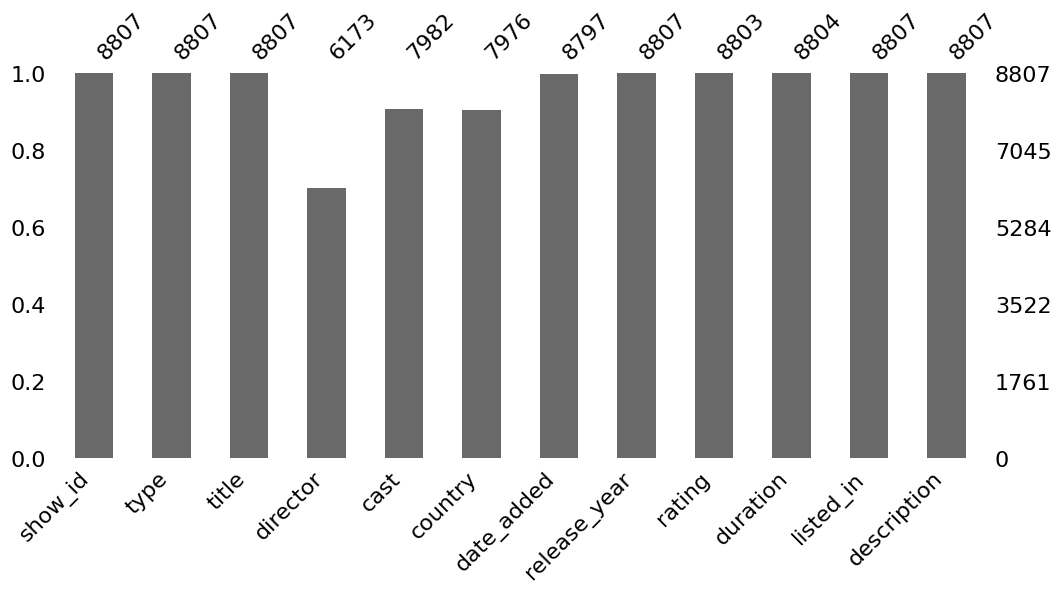

In [133]:
missingno.bar(netflix_data,figsize=(12,5))

In [134]:
netflix_data['director'].value_counts()

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
...,...
James Brown,1
Ivona Juka,1
Mu Chu,1


In [135]:
netflix_data['cast']

,cast
0,NaN
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,NaN
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
...,...
8802,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8803,NaN
8804,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), stop_words='english')
tfidf_matrix = tf.fit_transform(netflix_data['description'])

- Cosine Similarity: 문서들의 Tf-idf 벡터 기반

In [137]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
results = {}
for idx, row in netflix_data.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], netflix_data['show_id'][i]) for i in similar_indices]
    results[row['show_id']] = similar_items[1:]

In [138]:
def item(id):
    return netflix_data.loc[netflix_data['show_id'] == id]['title'].tolist()[0].split(' - ')[0]

# Just reads the results out of the dictionary.def
def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")
    print("-------")
    recs = results[item_id][:num]
    for rec in recs:
        print("Recommended: " + item(rec[1]) + " (score:" +      str(rec[0]) + ")")

In [139]:
recommend('s1305',6)

Recommending 6 products similar to Animals on the Loose: A You vs. Wild Movie...
-------
Recommended: You vs. Wild (score:0.09073680011826209)
Recommended: Man vs Wild with Sunny Leone (score:0.08601513298456359)
Recommended: 40 Sticks (score:0.058130066195245654)
Recommended: Headspace: Unwind Your Mind (score:0.05744985830847706)
Recommended: Captain Underpants Epic Choice-o-Rama (score:0.05686586934355088)
Recommended: The Boss Baby: Get That Baby! (score:0.05588214528282953)


- 벡터 표현을 Transformer로 부터 활용
 - BERT / RoBERTa / XLM-RoBERTa etc.

In [140]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 470.2/470.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

- SentenceTransformer('paraphrase-distilroberta-base-v1')
 - 모형: DistilBERT-base-uncased model fine tuned on a large dataset of paraphrase sentences

In [1]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-distilroberta-base-v1')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [2]:
import numpy as np
import pandas as pd
import missingno
netflix_data = pd.read_csv('netflix_titles.csv')
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
import numpy as np
descriptions = netflix_data['description'].tolist()
# print(descriptions)
des_embeddings = []
for i,des in enumerate(descriptions[0:100]): #100개로 실행
    des_embeddings.append(model.encode(des))

In [5]:
import torch
from sentence_transformers import SentenceTransformer, util

def recommend(query):
    #Compute cosine-similarities with all embeddings
    query_embedd = model.encode(query)
    cosine_scores = util.pytorch_cos_sim(query_embedd, des_embeddings)
    top5_matches = torch.argsort(cosine_scores, dim=-1, descending=True).tolist()[0][1:6]
    return top5_matches

id = 's1305'
query_show_des = netflix_data.loc[netflix_data['show_id'] == id]['description'].to_list()[0]
recommendded_results = recommend(query_show_des)

for index in recommendded_results:
    print(netflix_data.iloc[index,:])

show_id                                                       s81
type                                                        Movie
title                                 Firedrake the Silver Dragon
director                                              Tomer Eshed
cast            Thomas Brodie-Sangster, Felicity Jones, Freddi...
country                                                       NaN
date_added                                     September 10, 2021
release_year                                                 2021
rating                                                      TV-Y7
duration                                                   93 min
listed_in                                Children & Family Movies
description     When his home is threatened by humans, a young...
Name: 80, dtype: object
show_id                                                       s99
type                                                      TV Show
title                                   Octonauts: A

/usr/local/lib/python3.11/dist-packages/sentence_transformers/util.py:55: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  a = torch.tensor(a)


- 참고: TMDB 5000 (https://www.kaggle.com/tmdb/tmdb-movie-metadata)
